# Data preparation

In [18]:
library(dplyr);library(ggplot2);library(class);library(lattice)
library(caret);library(psych);library(mlbench)
data("PimaIndiansDiabetes2");str(PimaIndiansDiabetes2);summary(PimaIndiansDiabetes2)
PimaIndiansDiabetes2%>% group_by(diabetes) %>% summarise(count=n(),"% of cases"=round(100*n()/nrow(PimaIndiansDiabetes2),1))

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 NA 70 96 ...
 $ triceps : num  35 29 NA 23 35 NA 32 NA 45 NA ...
 $ insulin : num  NA NA NA 94 168 NA 88 NA 543 NA ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 NA ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00            
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 M

diabetes,count,% of cases
neg,500,65.1
pos,268,34.9


In [19]:
dia <- PimaIndiansDiabetes2[complete.cases(PimaIndiansDiabetes2),] 
rownames(dia) <- 1:nrow(dia)
dia <- dia %>% mutate(GIratio = glucose/insulin)
dia <- dia[,c(ncol(dia),1:(ncol(dia)-1))]
nrow(dia)
diaplot <- dia%>% group_by(diabetes) #to boxplot
summarise(diaplot,count=n(),"% of cases"=round(100*n()/nrow(diaplot),1))
summary(dia)

[1] 392

diabetes,count,% of cases
neg,262,66.8
pos,130,33.2


    GIratio           pregnant         glucose         pressure     
 Min.   : 0.2067   Min.   : 0.000   Min.   : 56.0   Min.   : 24.00  
 1st Qu.: 0.6698   1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00  
 Median : 0.9872   Median : 2.000   Median :119.0   Median : 70.00  
 Mean   : 1.1555   Mean   : 3.301   Mean   :122.6   Mean   : 70.66  
 3rd Qu.: 1.3333   3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00  
 Max.   :12.8571   Max.   :17.000   Max.   :198.0   Max.   :110.00  
    triceps         insulin            mass          pedigree     
 Min.   : 7.00   Min.   : 14.00   Min.   :18.20   Min.   :0.0850  
 1st Qu.:21.00   1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697  
 Median :29.00   Median :125.50   Median :33.20   Median :0.4495  
 Mean   :29.15   Mean   :156.06   Mean   :33.09   Mean   :0.5230  
 3rd Qu.:37.00   3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870  
 Max.   :63.00   Max.   :846.00   Max.   :67.10   Max.   :2.4200  
      age        diabetes 
 Min.   :21.00   neg:

# EDA

## r/s btw variables and diabetes class (box, histo)

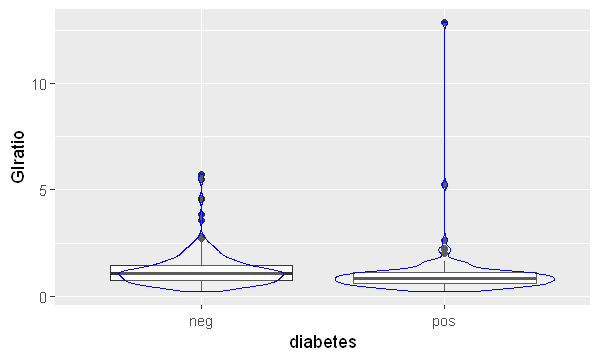

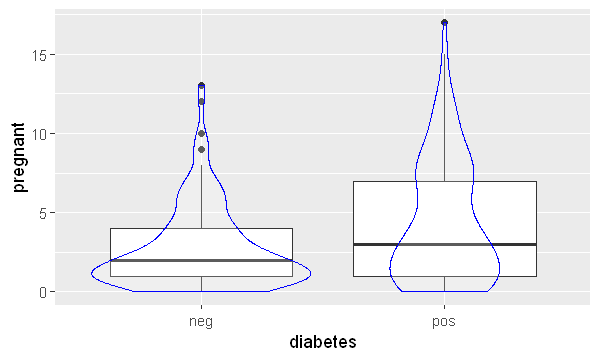

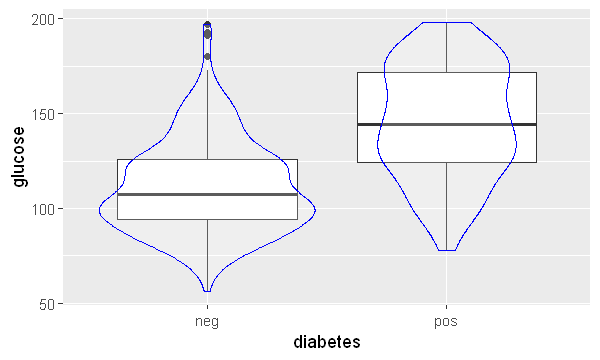

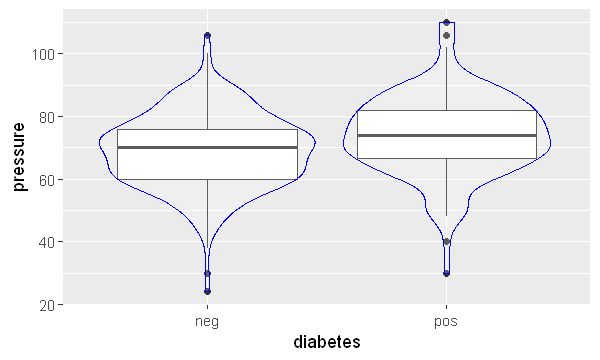

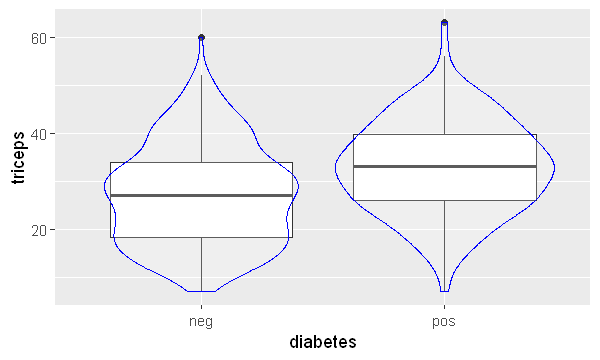

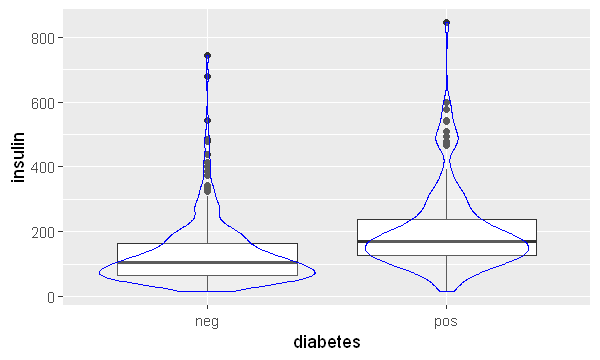

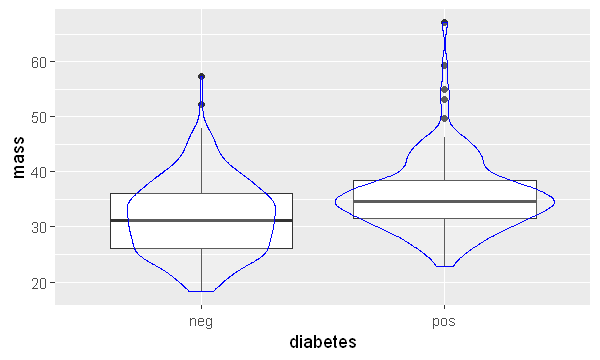

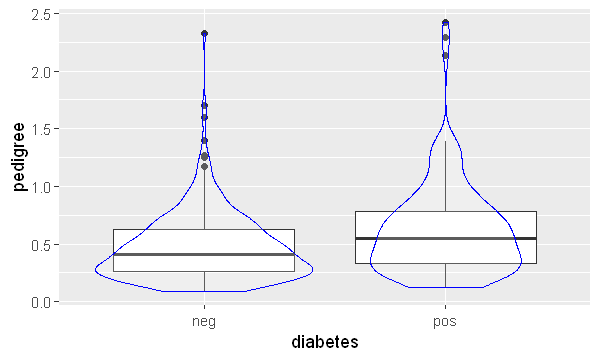

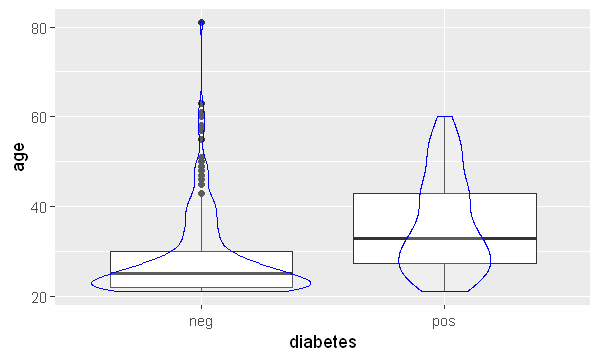

In [20]:
library(repr); options(repr.plot.width=5, repr.plot.height=3)
diaplot <- dia%>% group_by(diabetes) #to boxplot
for(i in 1:(ncol(diaplot)-1)){
  print(ggplot(diaplot,aes(x=diabetes, y=diaplot[[i]]))+geom_boxplot() +geom_violin(alpha=0.2,color="blue") +ylab(colnames(diaplot[i])))
  #print(ggplot(diaplot, aes(x=diaplot[[i]], fill=diabetes))+geom_histogram(bins=30)+xlab(colnames(diaplot[i])))
}

#for(i in 1:8){
#  diageomplot <- dia %>% mutate(y=ifelse(diabetes == 'pos',1,0)) %>% select(-diabetes) %>% group_by(dia[i]) %>% summarise_at(vars(y), list(probability =mean))
#  print(ggplot(diageomplot,aes(x=diageomplot[[1]],y=probability,fill=probability))+geom_bar(stat='identity')+xlab(colnames(diageomplot[1])) +ylab('% of positive diabetes'))
#}

### Finding natural clusters and relation between variables

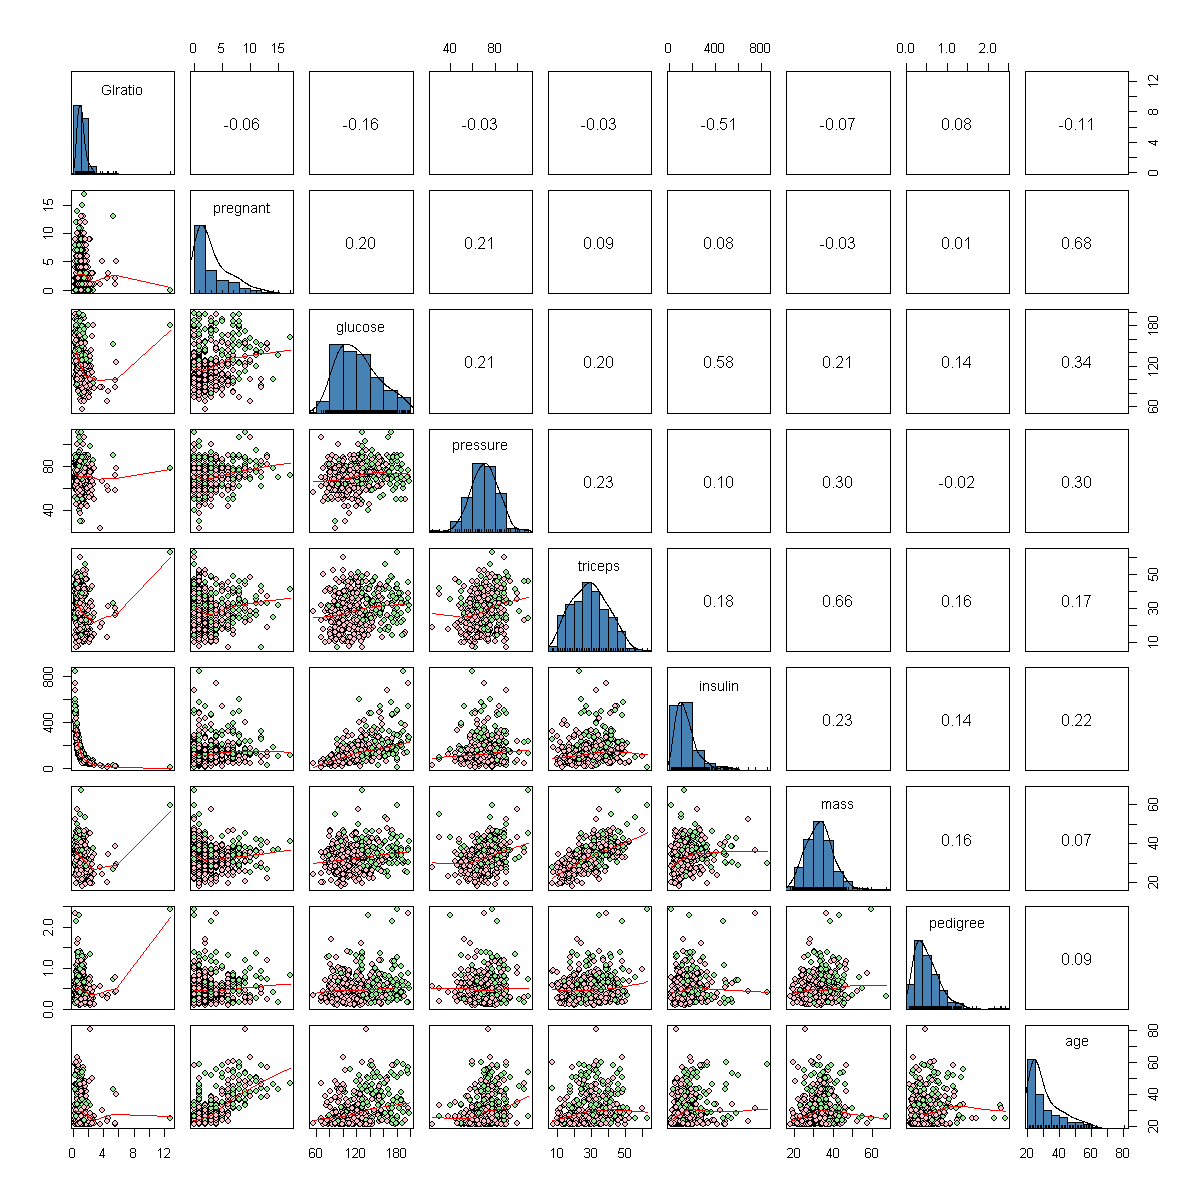

In [21]:
options(repr.plot.width=10, repr.plot.height=10)
pairs.panels(dia[,-ncol(diaplot)], method = "pearson", hist.col = "steelblue", pch = 21, bg = c("pink", "light green")[(dia$diabetes)],
             density = TRUE, ellipses = FALSE)

natural cluster in glucose vs insulin, mass vs triceps, pregnant vs age

### Hierarchical Clustering

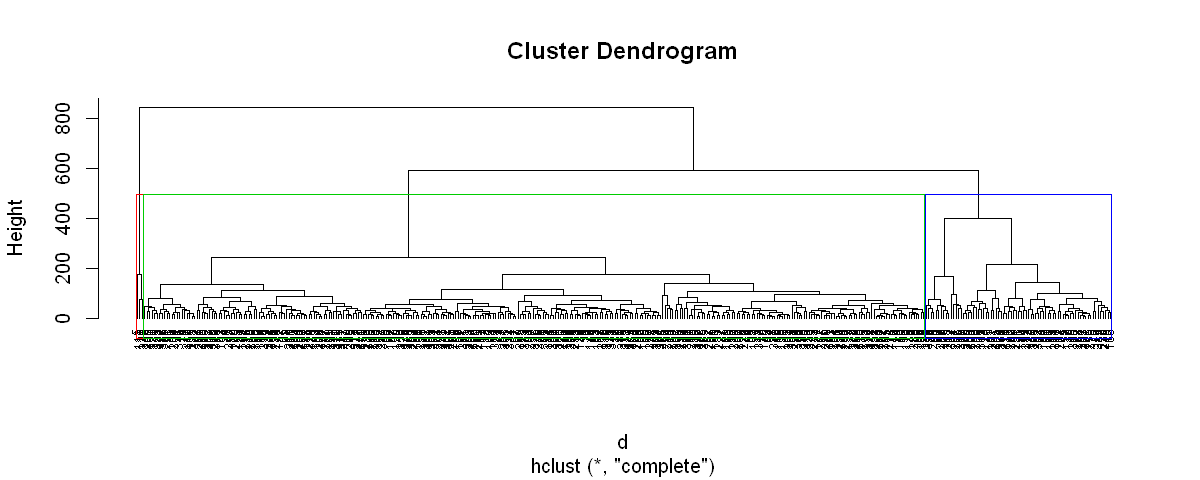

In [22]:
options(repr.plot.width=10, repr.plot.height=4)
dia_numeric <- select(dia,-diabetes)
d <- dist(dia_numeric, method="euclidean") 
hc <- hclust(d, method = 'complete')
plot(hc, cex = 0.6, hang = -1)
rect.hclust(hc, k = 3, border = 2:4)

suspect that first cluster formed by outliers

### Remove extreme statistical outliers

In [23]:
dia_outlier_removed <- dia
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",dia_outlier_removed[1]<6,dia_outlier_removed[1]<6))
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",pregnant<15,pregnant<15))
#dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",glucose<170,glucose<200))
#dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",pressure>27,pressure>35))
#dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",triceps<59,triceps<60))
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",insulin<640,insulin<640))
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",mass<65,mass<65))
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",pedigree<2,pedigree<2))
dia_outlier_removed <- dia_outlier_removed %>% filter(ifelse(diabetes == "neg",age<75,age<75))
nrow(dia_outlier_removed)

[1] 382

### Replot

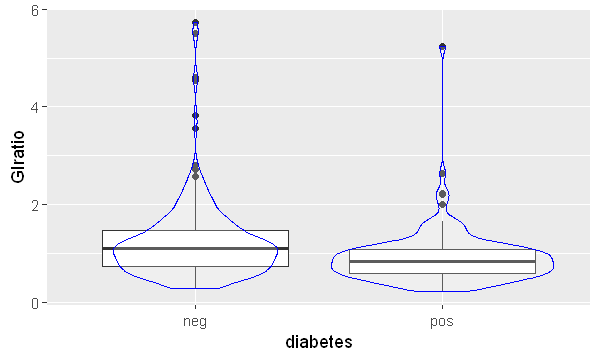

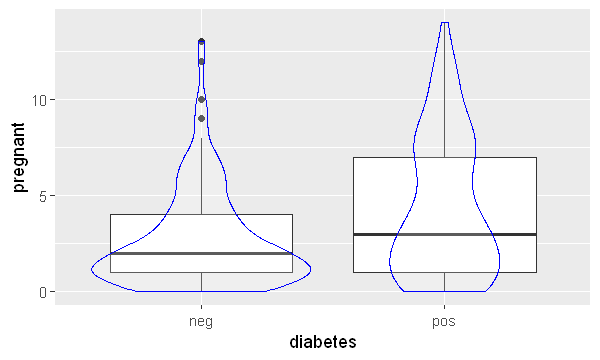

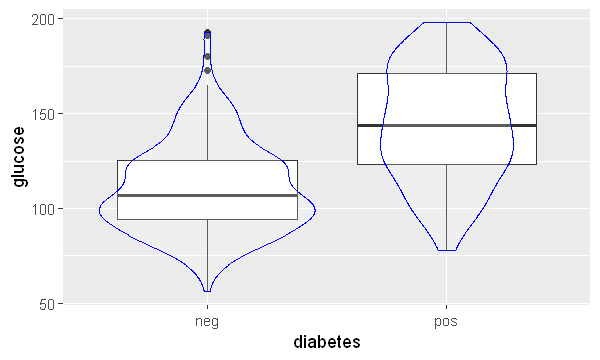

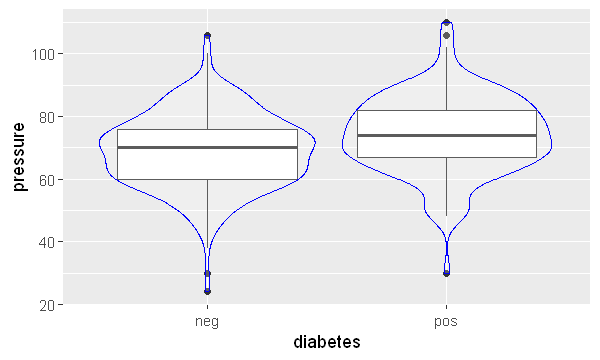

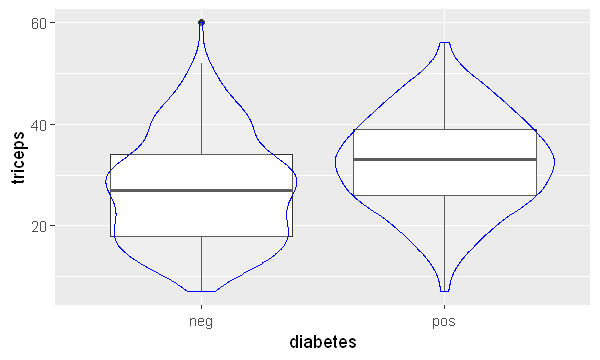

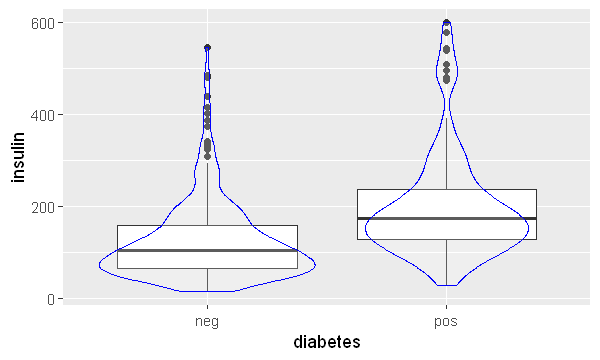

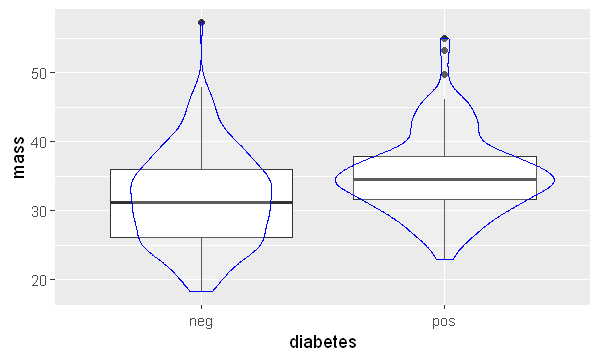

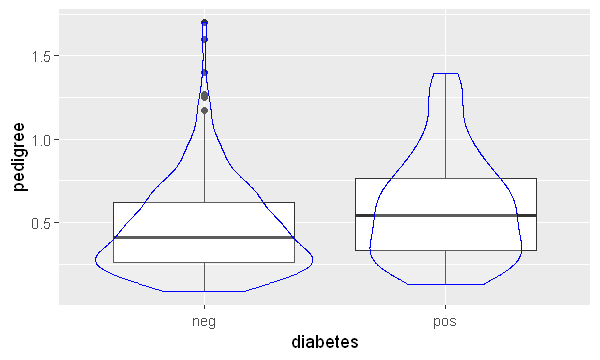

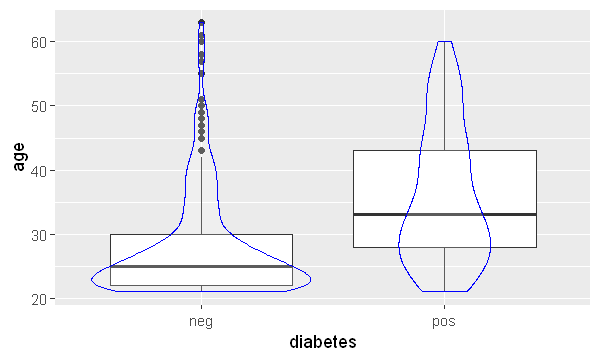

In [24]:
options(repr.plot.width=5, repr.plot.height=3)
diaplot <- dia_outlier_removed%>% group_by(diabetes) #to boxplot
for(i in 1:(ncol(diaplot)-1)){
  print(ggplot(diaplot,aes(x=diabetes, y=diaplot[[i]]))+geom_boxplot() +geom_violin(alpha=0.2,color="blue") +ylab(colnames(diaplot[i])))
  #print(ggplot(diaplot, aes(x=diaplot[[i]], fill=diabetes))+geom_histogram(bins=30)+xlab(colnames(diaplot[i])))
}

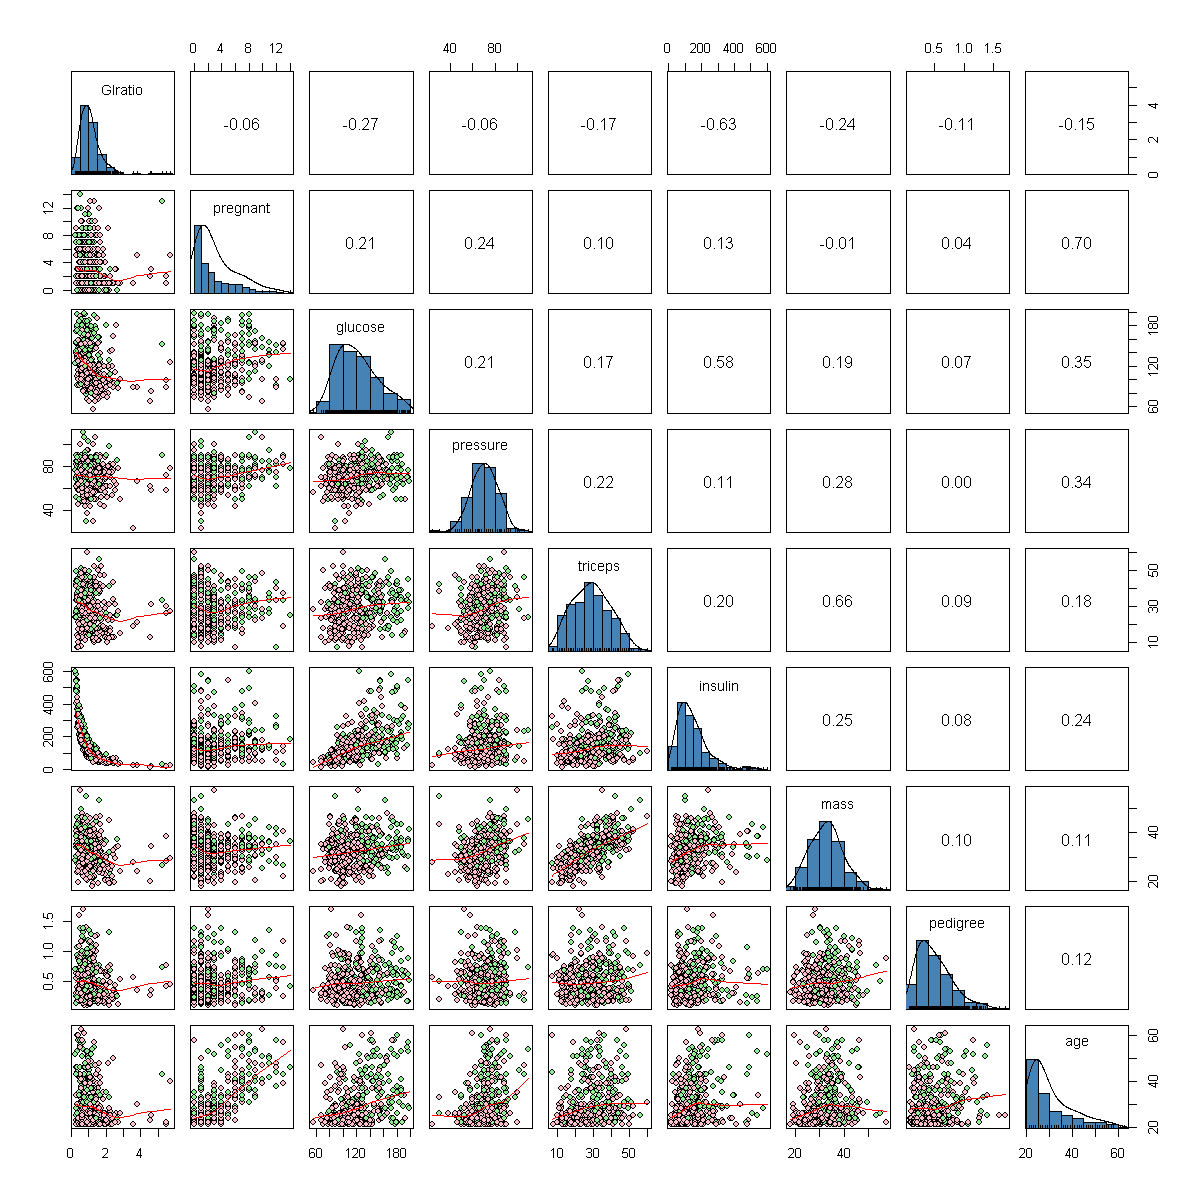

In [25]:
options(repr.plot.width=10, repr.plot.height=10)
pairs.panels(diaplot[,-ncol(diaplot)], method = "pearson", hist.col = "steelblue", pch = 21, bg = c("pink", "light green")[(diaplot$diabetes)],
             density = TRUE, ellipses = FALSE)

### Recluster after remove outliers

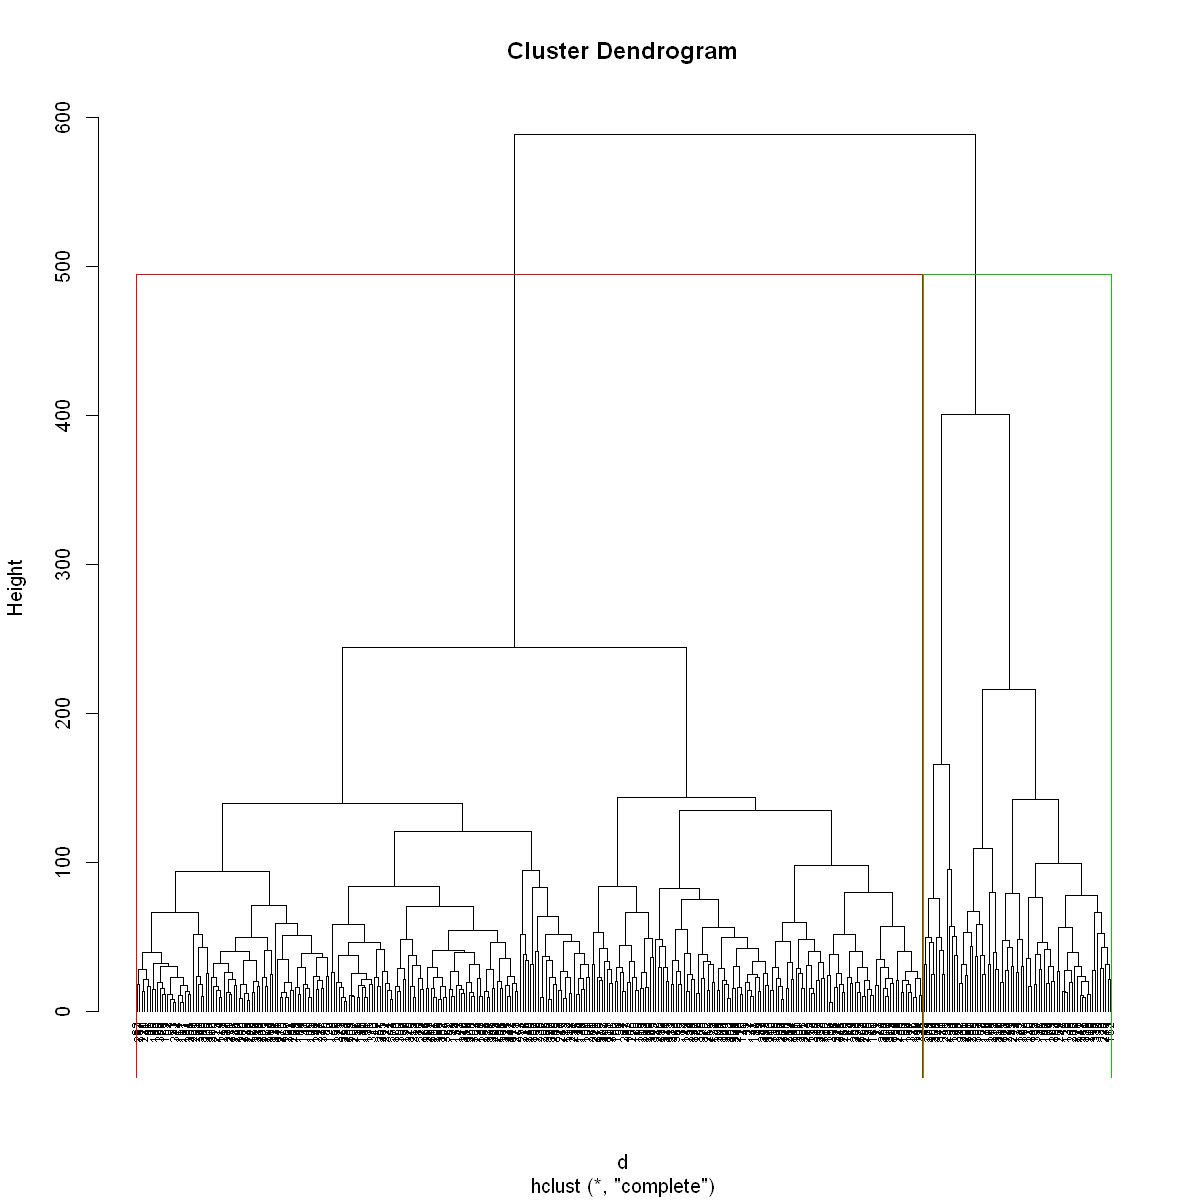

In [26]:
dia_numeric <- select(dia_outlier_removed,-diabetes)
d <- dist(dia_numeric, method="euclidean") 
hc <- hclust(d, method = 'complete')
plot(hc, cex = 0.6, hang = -1)
rect.hclust(hc, k = 2, border = 2:3) 

In [27]:
sub_grp <- cutree(hc, k = 2)
diacluster <- dia_outlier_removed %>%
  mutate(clust = sub_grp) %>% group_by(clust)
count(diacluster, diabetes_positive = diabetes == "pos")
summarise(diacluster, count=n())

clust,diabetes_positive,n
1,FALSE,222
1,TRUE,86
2,FALSE,37
2,TRUE,37


clust,count
1,308
2,74


In [28]:
# clust1 - 86/308= 28% pos
# clust2 - 37/74= 50% pos 

# Classification

## Logistic regression 

### Train/Test prep and split

In [149]:
dia_factored <- dia_outlier_removed %>% mutate(y=factor(ifelse(diabetes == 'pos',1,0))) %>% select(-diabetes,-pressure)

set.seed(100)
training.idx = sample(1:nrow(dia_factored),nrow(dia_factored)*0.6)
train.data = dia_factored[training.idx,]
test.data = dia_factored[-training.idx,]
train.data %>% group_by(y) %>% summarise(count=n(),"% of cases"=round(100*n()/nrow(train.data),1))
test.data %>% group_by(y) %>% summarise(count=n(),"% of cases"=round(100*n()/nrow(test.data),1))

y,count,% of cases
0,157,68.6
1,72,31.4


y,count,% of cases
0,102,66.7
1,51,33.3


train and test have similar class imbalance as each other and with distrib of whole dataset

### Logistic regression model

In [144]:
#pregnant+pressure+triceps+insulin+mass+pedigree+glucose+age 0.77base
#exp(pregnant) 
mlogist <- glm(y~pregnant+GIratio+triceps+insulin+mass+pedigree+glucose+age, data=train.data, family="binomial")
predictions <- predict(mlogist,test.data, type='response')
y_pred <- factor(ifelse(predictions>0.5,1,0),levels=c(0,1))
mean(y_pred == test.data$y) #0.77778
table(y_pred,test.data$y) 

[1] 0.751634

      
y_pred  0  1
     0 86 22
     1 16 29

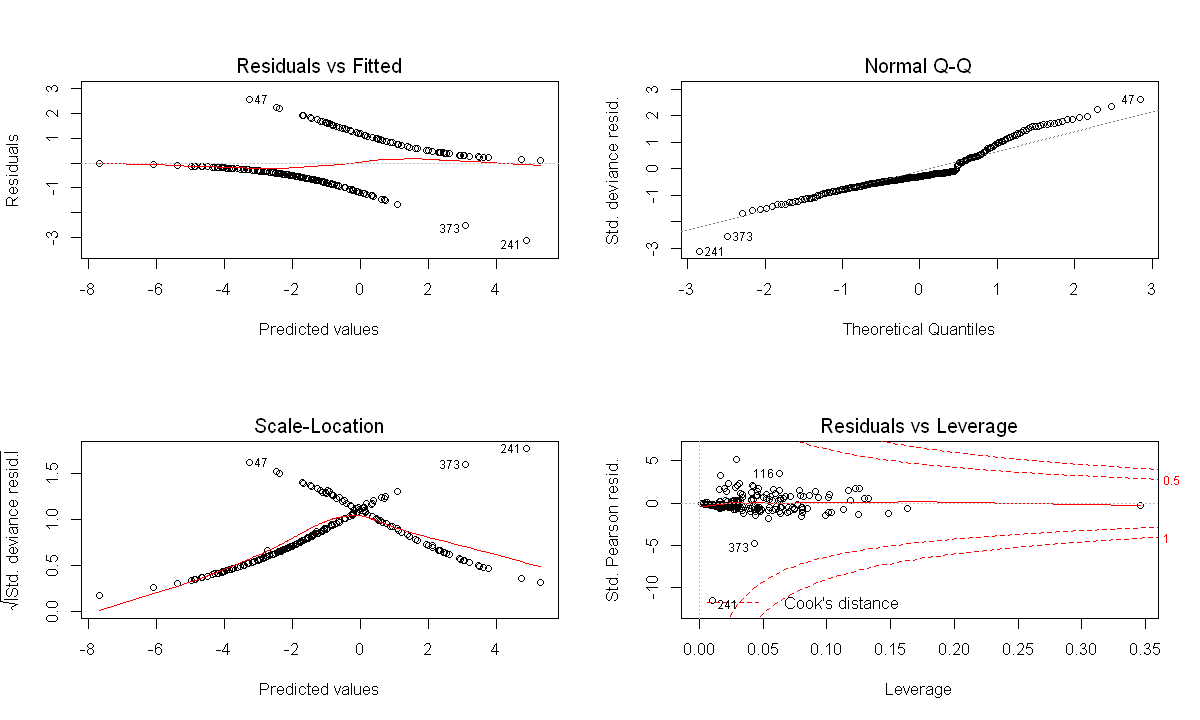

In [145]:
## plot logistic reg model
par(mfrow=c(2,2)); options(repr.plot.width=10, repr.plot.height=6)
plot(mlogist) #outlier 3
par(mfrow=c(1,1))

### Improve log reg by removing outlier

In [150]:
dia_factored[c(47,241),] 
241 %in% training.idx
train_improved.data = train.data[-c(47,241),]

mlogist <- glm(y~., data=train_improved.data, family="binomial")
predictions <- predict(mlogist,test.data, type='response')
y_pred <- factor(ifelse(predictions>0.5,1,0),levels=c(0,1))
mean(y_pred == test.data$y)
table(y_pred,test.data$y) 

,GIratio,pregnant,glucose,triceps,insulin,mass,pedigree,age,y
47,2.6388889,0,95,25,36,37.4,0.247,24,1
241,0.6528302,0,173,32,265,46.5,1.159,58,0


[1] TRUE

[1] 0.7581699

      
y_pred  0  1
     0 85 20
     1 17 31

not visible improvement

## kNN classify

,GIratio,pregnant,glucose,triceps,insulin,mass,pedigree,age,y
202,0.37845089,0.07142857,0.6126761,0.2830189,0.08156028,0.2173913,0.1128713,0.0000000,0
358,0.03539257,0.50000000,0.9225352,0.4905660,0.66843972,0.4266304,0.4891089,0.3333333,1
112,0.07197173,0.42857143,0.4436620,0.2830189,0.28546099,0.2418478,0.8138614,0.3076923,1
206,0.07635611,0.07142857,0.4436620,0.6415094,0.27482270,0.7364130,0.2785479,0.1282051,0
4,0.12202531,0.35714286,0.7746479,0.2264151,0.28368794,0.2065217,0.3313531,0.7692308,1
311,0.09792402,0.00000000,0.2676056,0.3773585,0.17730496,0.6875000,0.1729373,0.0000000,0


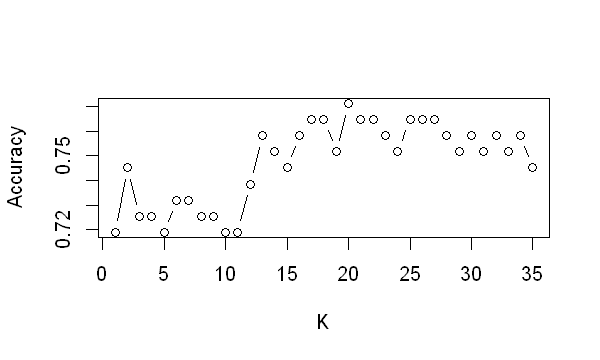

In [155]:
nor <-function(x) {(x -min(x))/(max(x)-min(x))}
#dia_nor <- dia_factored
#dia_nor[,1:8] <- sapply(dia_nor[,1:8],nor)
train_knn.data <- train.data
test_knn.data <- test.data
train_knn.data[,1:8] <- sapply(train_knn.data[,1:8],nor)
test_knn.data[,1:8] <- sapply(test_knn.data[,1:8],nor)
#set.seed(100)
#training.idx = sample(1:nrow(dia_nor),nrow(dia_nor)*0.8)
#train_knn.data = dia_nor[training.idx,]
#test_knn.data = dia_nor[-training.idx,]
head(train_knn.data)
x = rep(0,35)
for(i in 1:35){
  set.seed(100)
  knn.i = knn(train_knn.data[,1:8],test_knn.data[,1:8],train_knn.data$y,k=i)
  x[i] = mean(knn.i==test_knn.data$y)}
  #cat("k=", i, " accuracy=", x[i], "\n")
options(repr.plot.width=5, repr.plot.height=3); plot(x, type="b", xlab="K",ylab="Accuracy")
set.seed(100)
knn2 = knn(train_knn.data[,1:8],test_knn.data[,1:8],train_knn.data$y,k=20)

In [147]:
mean(knn2==test_knn.data$y) #0.7
table(knn2, test_knn.data$y)

[1] 0.7712418

    
knn2  0  1
   0 94 27
   1  8 24

### Improve kNN classi by weighting predictors

Weighting predictors

In [153]:
train_knn_stretch.data <- train_knn.data
test_knn_stretch.data <- test_knn.data

#diamean <- dia_factored %>% group_by(y) %>% summarise_all("mean")
#scaling the normalized data base on significance found by mean
# for(i in 1:8){
#     y <- (diamean[2,i+1] - diamean[1,i+1])/diamean[1,i+1]
#     dia_nor[i] <- dia_nor[i] * (y[1,1])}

#scale gluc5.9, pedi4.1
train_knn_stretch.data$glucose <- train_knn_stretch.data$glucose * (1.59)
test_knn_stretch.data$glucose <- test_knn_stretch.data$glucose * (1.59)
head(train_knn_stretch.data,4)
#dia_nor[7] <- dia_nor[7] * (1.41)

,GIratio,pregnant,glucose,triceps,insulin,mass,pedigree,age,y
202,0.37845089,0.07142857,0.9741549,0.2830189,0.08156028,0.2173913,0.1128713,0.0000000,0
358,0.03539257,0.50000000,1.4668310,0.4905660,0.66843972,0.4266304,0.4891089,0.3333333,1
112,0.07197173,0.42857143,0.7054225,0.2830189,0.28546099,0.2418478,0.8138614,0.3076923,1
206,0.07635611,0.07142857,0.7054225,0.6415094,0.27482270,0.7364130,0.2785479,0.1282051,0


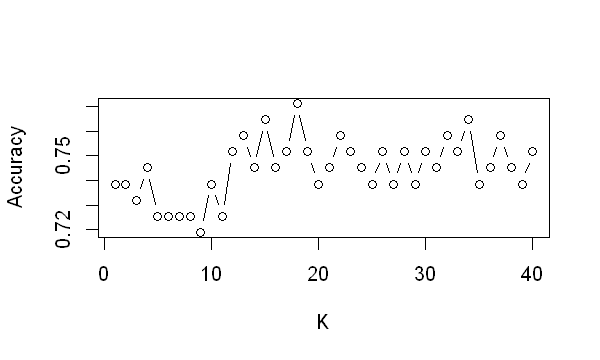

In [157]:
x = rep(0,40)
for(i in 1:40){
  set.seed(100)
  knn.i = knn(train_knn_stretch.data[,1:8],test_knn_stretch.data[,1:8],train_knn_stretch.data$y,k=i)
  x[i] = mean(knn.i==test_knn_stretch.data$y)}
  #cat("k=", i, " accuracy=", x[i], "\n")}
plot(x, type="b", xlab="K",ylab="Accuracy")  #the best k
set.seed(100)
knn2 = knn(train_knn_stretch.data[,1:8],test_knn_stretch.data[,1:8],train_knn_stretch.data$y,k=18)

In [158]:
mean(knn2==test_knn_stretch.data$y) #0.78947
table(knn2, test_knn_stretch.data$y)

[1] 0.7712418

    
knn2  0  1
   0 91 24
   1 11 27

improvement??

## SVM classify

In [148]:
train_svm.data <- train.data
test_svm.data <- test.data

library(e1071)
m.svm <- svm(y~.,data=train_svm.data, kernel='linear')
predictions <- predict(m.svm,test_svm.data)
mean(predictions == test_svm.data$y) 
table(predictions, test_svm.data$y)
#exclude radial

[1] 0.7581699

           
predictions  0  1
          0 87 22
          1 15 29

In [159]:
set.seed(100)
m.svm <- svm(y~., data=train_svm.data, kernel='polynomial',degree=2, cost=10^(-3), gamma=4, coef0=5)
predictions <- predict(m.svm,test_svm.data)
mean(predictions == test_svm.data$y)
table(predictions,test_svm.data$y)

[1] 0.7581699

           
predictions  0  1
          0 90 25
          1 12 26

# Impute insulin NA values to improve classif

In [ ]:
#From data exploration, glucose mass age has correlation of more than 0.2
dia_regression <- dia %>% select(glucose,mass,age,insulin)
pairs.panels(dia_regression[,], method = "pearson", hist.col = "steelblue", pch = 21, bg = c("pink", "light green")[(dia$diabetes)],
             density = TRUE, ellipses = FALSE)

### kNN regression

In [ ]:
set.seed(100)
training.idx <- sample(1:nrow(dia_regression),nrow(dia_regression)*0.8)
train_regression.data <- dia_regression[training.idx,]
test_regression.data <- dia_regression[-training.idx,]
dim(train_regression.data)

set.seed(100); options(repr.plot.width=5, repr.plot.height=4)
#training model using KNN model, predicting insulin using all other variables, 1 cv = 50 data row
knn_model <- train(insulin~., data = train_regression.data, method = "knn", trControl = trainControl("cv", number = 7), 
               preProcess = c("center","scale"), tuneLength = 10) #how to find best tuneLength?
#plot(knn_model)
knn_model$bestTune
predictions <- predict(knn_model,test_regression.data)
RMSE(predictions,test_regression.data$insulin) #75.39407
plot(test_regression.data$insulin, predictions,main="Prediction performance of kNN regression")
abline(0,1, col="red") #reference line x = y

## Logistic reg classify BEFORE imputing, without triceps

In [ ]:
dia_factored <- PimaIndiansDiabetes2 %>% select(-triceps) 
dia_factored <- dia_factored[complete.cases(dia_factored),] 
dia_factored <- dia_factored %>% mutate(y=factor(ifelse(diabetes == 'pos',1,0))) %>% select(-diabetes)
set.seed(100)
trainingbef.idx = sample(1:nrow(dia_factored),nrow(dia_factored)*0.6)
trainbef.data = dia_factored[trainingbef.idx,]
testbef.data = dia_factored[-trainingbef.idx,]
mlogist <- glm(y~., data=trainbef.data, family="binomial")
predictions <- predict(mlogist,testbef.data, type='response')
y_pred <- factor(ifelse(predictions>0.5,1,0),levels=c(0,1))
mean(y_pred == testbef.data$y) #0.7974684
table(y_pred,testbef.data$y) 

## Imputing insulin

In [ ]:
dia_impute <- PimaIndiansDiabetes2[is.na(PimaIndiansDiabetes2[,"insulin"]),]
dia_impute <- dia_impute %>% select(insulin,mass,glucose,age)
dia_impute <- dia_impute[!is.na(dia_impute[,"mass"]),]
dia_impute <- dia_impute[!is.na(dia_impute[,"glucose"]),]
imputevalue <- predict(knn_model,dia_impute)
dia_impute$insulin <- imputevalue
dia_r1 <- PimaIndiansDiabetes2[is.na(PimaIndiansDiabetes2[,"insulin"]),]
dia_r1 <- dia_r1[!is.na(dia_r1[,"mass"]),]
dia_r1 <- dia_r1[!is.na(dia_r1[,"glucose"]),]
dia_r1$insulin <- imputevalue
dia_r1 <- dia_r1 %>% select(-triceps)
dia_r1 <- dia_r1[complete.cases(dia_r1),] #332 of 8
dia_r1_factored <- dia_r1 %>% mutate(y=factor(ifelse(diabetes == 'pos',1,0))) %>% select(-diabetes)

## Logistic reg classify AFTER imputing

In [ ]:
train.data = rbind(trainbef.data,dia_r1_factored)
rownames(train.data) <- 1:nrow(train.data)
set.seed(100)
m.svm <- svm(y~pressure+pedigree+age+glucose, data=train.data, kernel='polynomial',degree=2, cost=10^(-1), gamma=1, coef0=9)
y_pred <- predict(m.svm,testbef.data)
mean(y_pred == testbef.data$y)
table(y_pred,testbef.data$y) 

In [ ]:
train.data = rbind(trainbef.data,dia_r1_factored)
rownames(train.data) <- 1:nrow(train.data)
mlogist_imputed <- glm(y~., data=train.data, family="binomial")
predictions <- predict(mlogist_imputed,testbef.data, type='response')
y_pred <- factor(ifelse(predictions>0.5,1,0),levels=c(0,1))
mean(y_pred == testbef.data$y) #0.7848101
table(y_pred,testbef.data$y) 

In [ ]:
predictions_nonimputed <- predict(mlogist,testbef.data, type='response')
y_pred_nonimputed <- factor(ifelse(predictions_nonimputed>0.5,1,0),levels=c(0,1))
mean(y_pred_nonimputed == testbef.data$y) #0.7974684
table(y_pred_nonimputed,testbef.data$y) 